In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Load the dataset
csv_path = '/content/newstyle.csv'
df = pd.read_csv(csv_path)
df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,usage,productDisplayName,Unnamed: 9,Unnamed: 10
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,Casual,Turtle Check Men Navy Blue Shirt,NaN,NaN
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,Casual,Peter England Men Party Blue Jeans,NaN,NaN
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,Casual,Titan Women Silver Watch,NaN,NaN
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,Casual,Manchester United Men Solid Black Track Pants,NaN,NaN
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,Casual,Puma Men Grey T-shirt,NaN,NaN


In [7]:
# Dropping the 'Unnamed: 9' column
df = df.drop(columns=['Unnamed: 9'])

In [8]:
df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,usage,productDisplayName,Unnamed: 10
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,Casual,Turtle Check Men Navy Blue Shirt,NaN
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,Casual,Peter England Men Party Blue Jeans,NaN
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,Casual,Titan Women Silver Watch,NaN
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,Casual,Manchester United Men Solid Black Track Pants,NaN
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,Casual,Puma Men Grey T-shirt,NaN


In [9]:
# Dropping the 'Unnamed: 10' column
df = df.drop(columns=['Unnamed: 10'])

In [22]:
df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,Casual,Puma Men Grey T-shirt


In [11]:
#data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44446 entries, 0 to 44445
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  44446 non-null  int64 
 1   gender              44446 non-null  object
 2   masterCategory      44446 non-null  object
 3   subCategory         44446 non-null  object
 4   articleType         44446 non-null  object
 5   baseColour          44431 non-null  object
 6   season              44425 non-null  object
 7   usage               44129 non-null  object
 8   productDisplayName  44439 non-null  object
dtypes: int64(1), object(8)
memory usage: 3.1+ MB


In [12]:
#number of unique data
df.nunique()

id                    44446
gender                    5
masterCategory            7
subCategory              45
articleType             143
baseColour               46
season                    4
usage                     8
productDisplayName    31135
dtype: int64

In [20]:
# finding the duplicates

df.duplicated().sum()

0

In [13]:
df.isnull().sum()

id                      0
gender                  0
masterCategory          0
subCategory             0
articleType             0
baseColour             15
season                 21
usage                 317
productDisplayName      7
dtype: int64

In [14]:
#null data percentage
(df.isnull().sum()/(len(df)))*100

id                    0.000000
gender                0.000000
masterCategory        0.000000
subCategory           0.000000
articleType           0.000000
baseColour            0.033749
season                0.047248
usage                 0.713225
productDisplayName    0.015749
dtype: float64

In [15]:
# Filling the null values
# For categorical data
for column in ['baseColour', 'season', 'usage']:
    df[column].fillna(df[column].mode()[0], inplace=True)
# For productDisplayName
df['productDisplayName'].fillna('Unknown Product', inplace=True)

In [16]:
df.isnull().sum()

id                    0
gender                0
masterCategory        0
subCategory           0
articleType           0
baseColour            0
season                0
usage                 0
productDisplayName    0
dtype: int64

In [18]:
print("Data types before conversion:\n", df.dtypes)

Data types before conversion:
 id                     int64
gender                object
masterCategory        object
subCategory           object
articleType           object
baseColour            object
season                object
usage                 object
productDisplayName    object
dtype: object


In [19]:
df.describe(include="object")

,gender,masterCategory,subCategory,articleType,baseColour,season,usage,productDisplayName
count,44446,44446,44446,44446,44446,44446,44446,44446
unique,5,7,45,143,46,4,8,31136
top,Men,Apparel,Topwear,Tshirts,Black,Summer,Casual,Lucera Women Silver Earrings
freq,22165,21400,15405,7070,9747,21497,34731,82


In [21]:
## Identifying the garbage values
for column in df.select_dtypes(include="object"):
    print(f"Column: {column}")
    value_counts = df[column].value_counts(dropna=False)
    print(value_counts)
    print("-" * 50)

    # Identify garbage values
    garbage_values = value_counts[value_counts < 5].index
    print(f"Garbage values: {garbage_values}")
    print("-" * 50)


Column: gender
gender
Men       22165
Women     18632
Unisex     2164
Boys        830
Girls       655
Name: count, dtype: int64
--------------------------------------------------
Garbage values: Index([], dtype='object', name='gender')
--------------------------------------------------
Column: masterCategory
masterCategory
Apparel           21400
Accessories       11289
Footwear           9222
Personal Care      2404
Free Items          105
Sporting Goods       25
Home                  1
Name: count, dtype: int64
--------------------------------------------------
Garbage values: Index(['Home'], dtype='object', name='masterCategory')
--------------------------------------------------
Column: subCategory
subCategory
Topwear                     15405
Shoes                        7344
Bags                         3055
Bottomwear                   2694
Watches                      2542
Innerwear                    1808
Jewellery                    1080
Eyewear                      1073
Frag

In [23]:
df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,Casual,Puma Men Grey T-shirt


from matplotlib import pyplot as plt
_df_14['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_15['id'].plot(kind='hist', bins=20, title='id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_16.groupby('gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_17.groupby('masterCategory').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_18.groupby('subCategory').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_19.groupby('articleType').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_20.plot(kind='scatter', x='index', y='id', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['id']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_21.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('gender')):
  _plot_series(series, series_name, i)
  fig.legend(title='gender', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('id')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['id']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_22.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('masterCategory')):
  _plot_series(series, series_name, i)
  fig.legend(title='masterCategory', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('id')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['id']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_23.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('subCategory')):
  _plot_series(series, series_name, i)
  fig.legend(title='subCategory', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('id')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['id']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_24.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('articleType')):
  _plot_series(series, series_name, i)
  fig.legend(title='articleType', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('id')

from matplotlib import pyplot as plt
_df_25['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_26['id'].plot(kind='line', figsize=(8, 4), title='id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['masterCategory'].value_counts()
    for x_label, grp in _df_27.groupby('gender')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('gender')
_ = plt.ylabel('masterCategory')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['subCategory'].value_counts()
    for x_label, grp in _df_28.groupby('masterCategory')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('masterCategory')
_ = plt.ylabel('subCategory')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['articleType'].value_counts()
    for x_label, grp in _df_29.groupby('subCategory')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('subCategory')
_ = plt.ylabel('articleType')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['baseColour'].value_counts()
    for x_label, grp in _df_30.groupby('articleType')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('articleType')
_ = plt.ylabel('baseColour')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_31['gender'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_31, x='index', y='gender', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_32['masterCategory'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_32, x='index', y='masterCategory', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_33['subCategory'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_33, x='index', y='subCategory', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_34['articleType'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_34, x='index', y='articleType', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

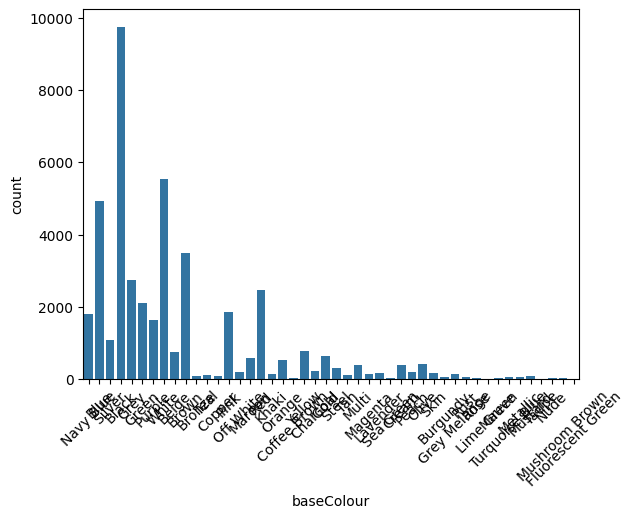

In [33]:
import seaborn as sns
sns.countplot(x='baseColour', data=df)
plt.xticks(rotation=45)
plt.show()

Base Colour


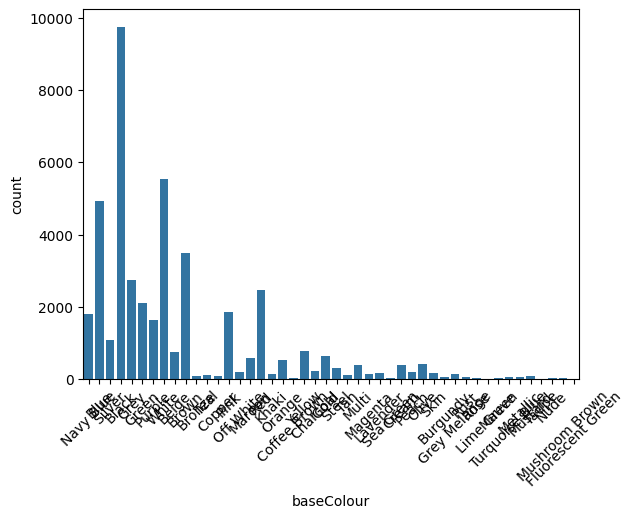

In [34]:
import seaborn as sns
sns.countplot(x='baseColour', data=df)
plt.xticks(rotation=45)
plt.show()

baseColour vs articleType

<ipython-input-35-63fbcd94534d>:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


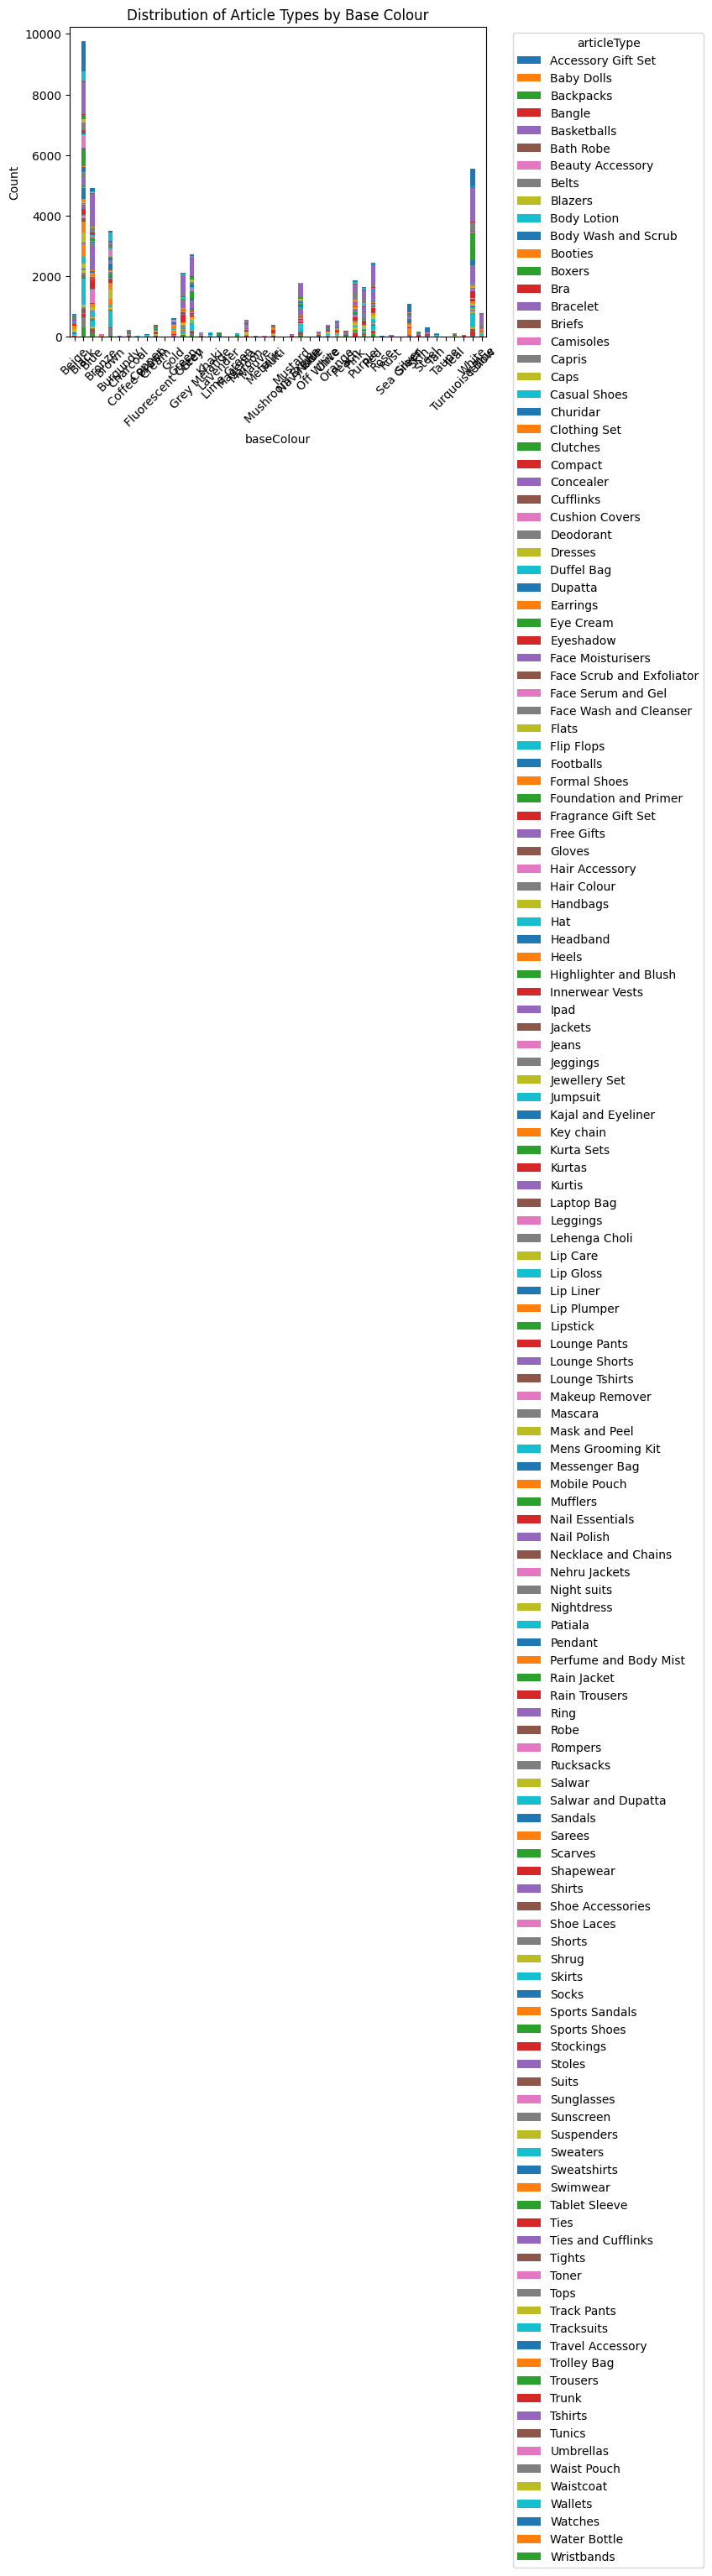

In [35]:
import matplotlib.pyplot as plt
# Group the data by 'baseColour' and 'articleType' and count the occurrences
grouped = df.groupby(['baseColour', 'articleType']).size().unstack()

# Plot the stacked bar chart
grouped.plot(kind='bar', stacked=True)
plt.xlabel('baseColour')
plt.ylabel('Count')
plt.title('Distribution of Article Types by Base Colour')
plt.xticks(rotation=45)
plt.legend(title='articleType', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

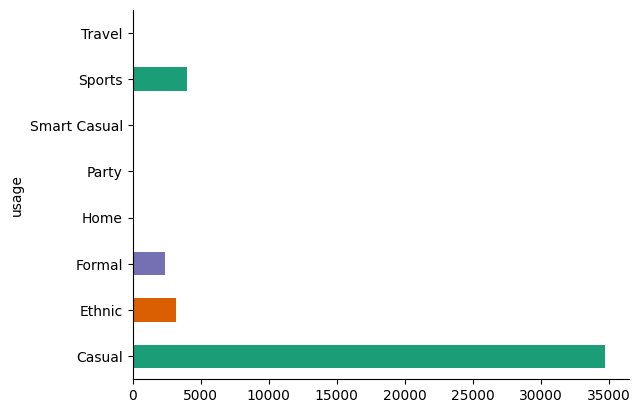

In [28]:
# @title usage

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('usage').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

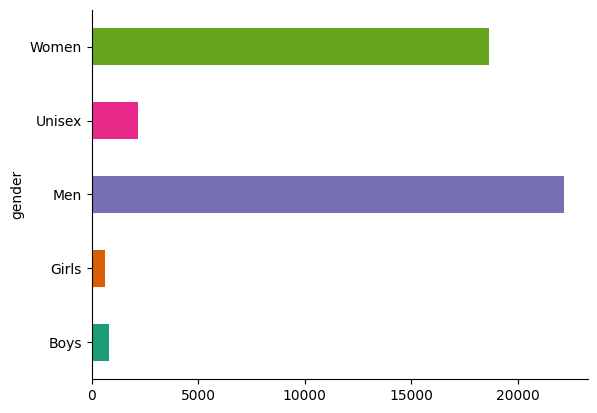

In [27]:
# @title gender

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

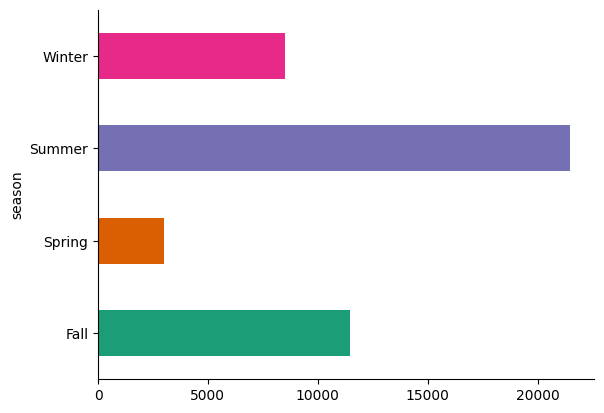

In [26]:
# @title season

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('season').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

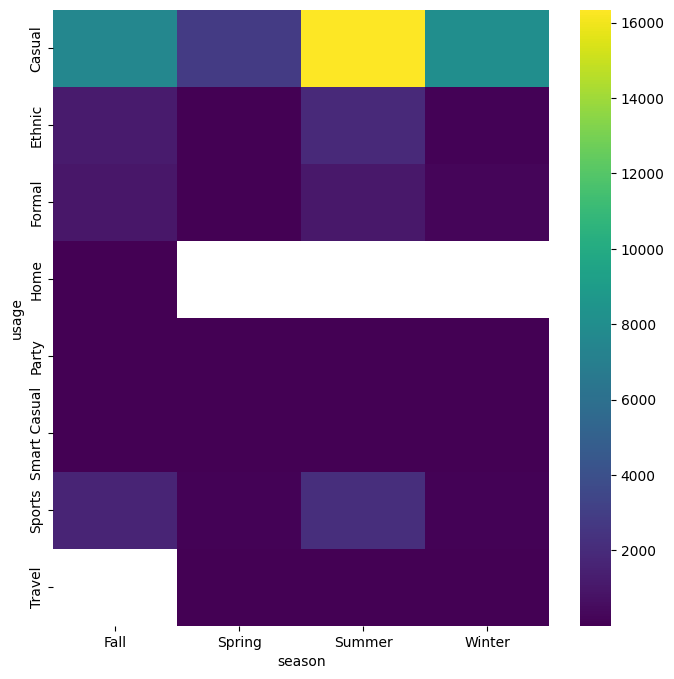

In [25]:
# @title season vs usage

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['usage'].value_counts()
    for x_label, grp in df.groupby('season')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('season')
_ = plt.ylabel('usage')

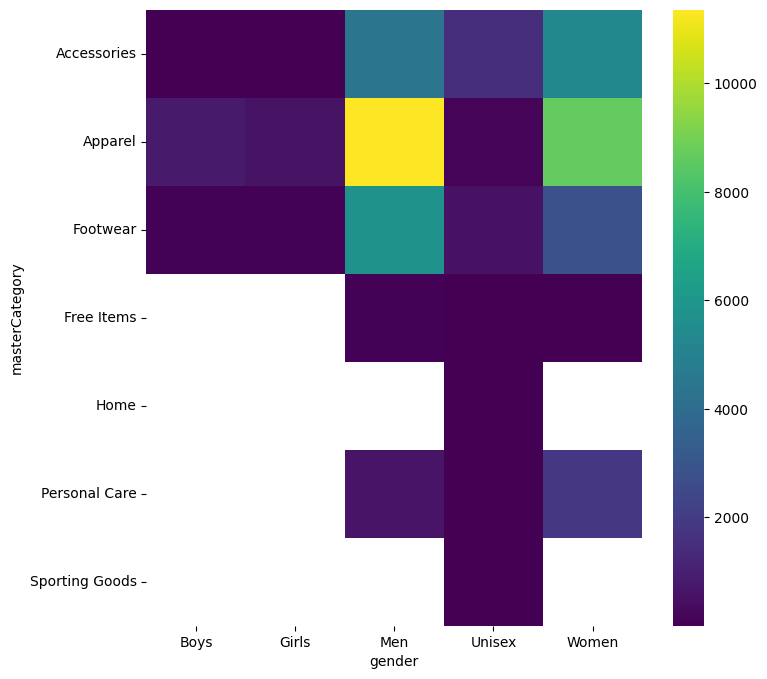

In [24]:
# @title gender vs masterCategory

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['masterCategory'].value_counts()
    for x_label, grp in df.groupby('gender')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('gender')
_ = plt.ylabel('masterCategory')

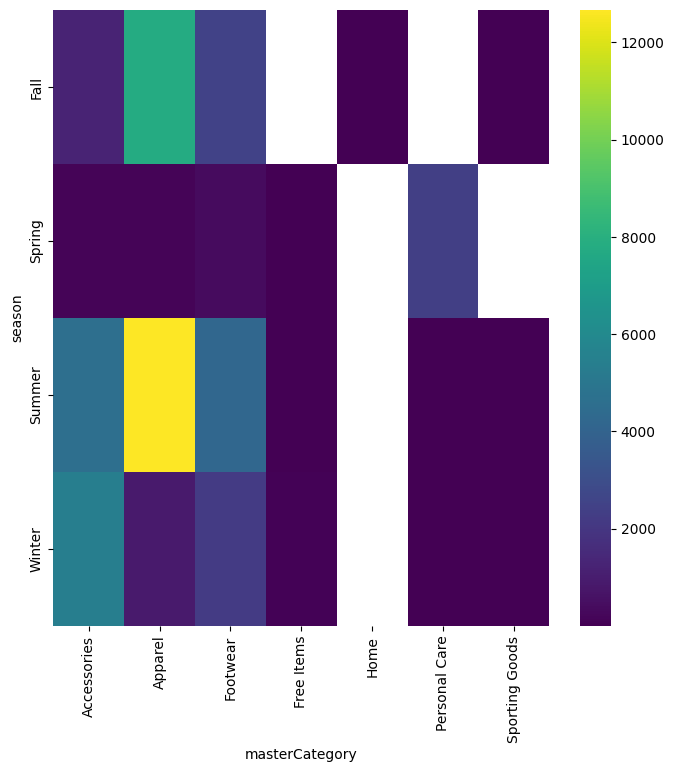

In [30]:
# @title masterCategory vs season

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['season'].value_counts()
    for x_label, grp in df.groupby('masterCategory')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('masterCategory')
_ = plt.ylabel('season')

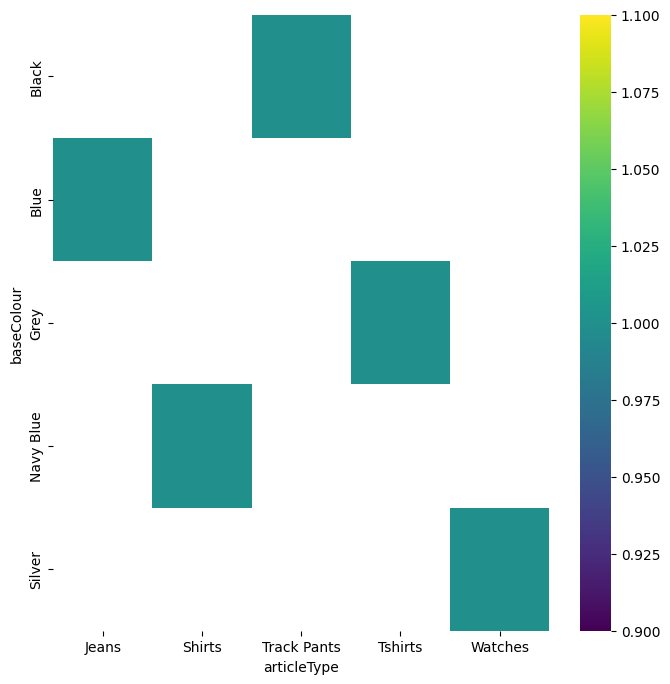

In [36]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['baseColour'].value_counts()
    for x_label, grp in _df_30.groupby('articleType')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('articleType')
_ = plt.ylabel('baseColour')